## Problem Set 5 - Boston House Prices dataset

In [14]:
# Imports
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import random
from datetime import datetime
import sys
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [15]:
# Loading boston dataset
boston = datasets.load_boston()
print(boston.keys())  # keys in data from sklearn
print(boston['DESCR'])  # Description of data

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,0

### Active Data Exploration

In [16]:
# Converting to dataframes

X = pd.DataFrame(boston.data)
Y = pd.DataFrame(boston.target)
X.columns = boston.feature_names  # Assigning names to features
Y.columns = ['MEDV']

In [17]:
# Exploring data
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [19]:
X.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [20]:
X.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [21]:
X.shape

(506, 13)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [23]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
#Engineered features from existing features

X['CRIM_ZN']=np.multiply(X['CRIM'],X['ZN']) 
X['ZN_INDUS'] = np.multiply(X['ZN'],X['INDUS']) 
X['NOX_B'] = np.multiply(X['NOX'],X['B']) 
X['LSTAT_PTRATIO'] = np.multiply(X['LSTAT'],X['PTRATIO']) 
X['CRIM_B'] = np.multiply(X['CRIM'],X['B']) 
X['LSTAT_RM'] = np.multiply(X['LSTAT'],X['RM']) 
X['DIS_RM'] = np.multiply(X['DIS'],X['RM']) 
X['TAX_log'] = np.log(X['TAX'])
X['ZN_square'] = np.square(X['ZN'])
X['RAD_RM'] = np.multiply(X['RAD'],X['RM']) 

In [25]:
# generating new random features

Z = datasets.make_classification(n_samples=506,n_features=11, n_redundant=0,scale=5,n_informative=2,flip_y=0.5)    
Z = pd.DataFrame(Z[0], columns=['B0','B1','B2','B3','B4','B5','B6','B7','B8','B9','B10']) # Assigning col names

In [26]:
Z.head()

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,6.796797,7.341887,-3.603816,-3.096706,-2.234633,-6.956128,-1.244589,2.702818,-2.967321,7.596624,-4.247394
1,-4.937540,6.719207,-1.426851,-0.576904,-3.477423,-0.259373,-6.341240,-1.422559,-3.210169,-0.520991,2.390422
2,6.599470,0.838268,3.672788,8.556027,-10.426830,2.962177,-0.092400,-2.600035,-3.563420,13.232992,-6.918143
3,10.651657,3.111108,1.701131,3.465347,2.426057,-1.905275,-3.903070,-6.274036,10.941689,1.496604,16.359220
4,5.431803,-6.902086,5.442214,11.739808,-5.043133,9.086477,-1.988759,-4.773340,-7.432723,-2.820161,-2.195225


In [27]:
X = pd.concat([X,Z],axis=1) # Concating new external features with exisitng dataframe

In [28]:
X.columns # Columns in new dataframe

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CRIM_ZN', 'ZN_INDUS', 'NOX_B',
       'LSTAT_PTRATIO', 'CRIM_B', 'LSTAT_RM', 'DIS_RM', 'TAX_log', 'ZN_square',
       'RAD_RM', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10'],
      dtype='object')

In [29]:
X.shape # Shape of new dataframe

(506, 34)

In [30]:
# Summary statistics

mean_stats = X.mean().to_frame('Mean') # Calculating mean for the dataframe
range_stats = (X.max()-X.min()).to_frame('Range') # Calculating range for the dataframe
missing_stats = X.isnull().sum().to_frame('Missing Values') # Calculating missing values for the dataframe

summary_stats = pd.concat([mean_stats,range_stats,missing_stats],axis=1) #Concatenating the above dataframes.

corr = {}
for i in X.columns:
    corr[i]=(Y['MEDV'].corr(X[i])) 
summary_stats['Corr'] = corr.values()

In [31]:
summary_stats

,Mean,Range,Missing Values,Corr
CRIM,3.593761,88.969880,0,-0.385832
ZN,11.363636,100.000000,0,0.360445
INDUS,11.136779,27.280000,0,-0.483725
CHAS,0.069170,1.000000,0,0.175260
NOX,0.554695,0.486000,0,-0.427321
RM,6.284634,5.219000,0,0.695360
AGE,68.574901,97.100000,0,-0.376955
DIS,3.795043,10.996900,0,0.249929
RAD,9.549407,23.000000,0,-0.381626
TAX,408.237154,524.000000,0,-0.468536


In [32]:
# Defining data and the target class

data = pd.concat([X,Y],axis=1) # Commbining target class with data
Y = data['MEDV']

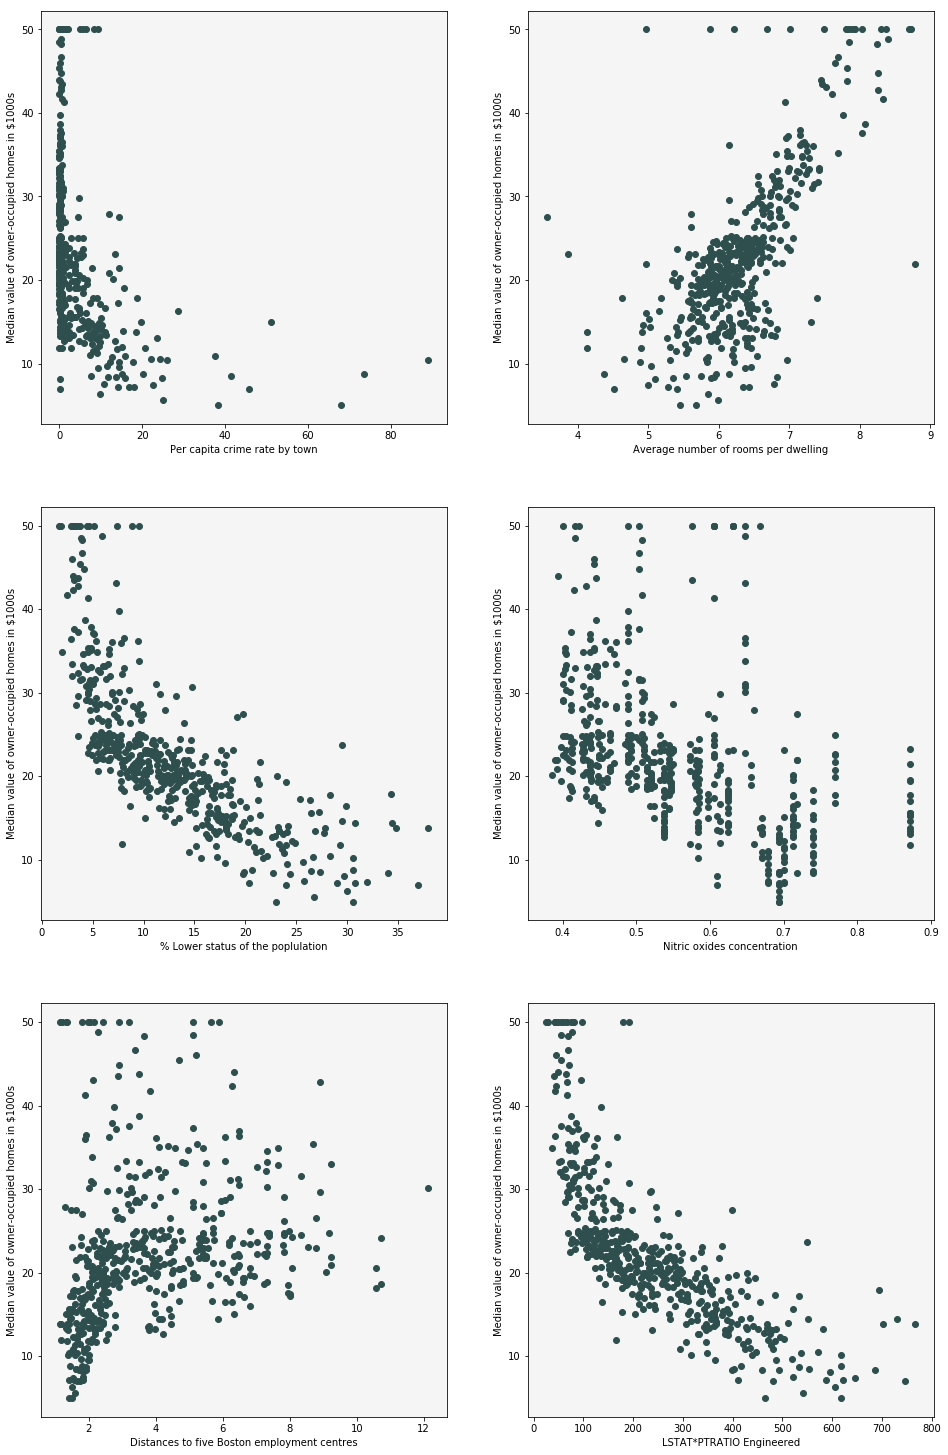

In [33]:
# Scatter Plot for features

#Relevant Features

plt.figure(figsize=(16,35))

# Plot 1 - Crime by Price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(4,2,1)
plt.scatter(data['CRIM'],data['MEDV'],c='darkslategrey')
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Median value of owner-occupied homes in $1000s')


# Plot 2 - No of rooms by Price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(4,2,2)
plt.scatter(data['RM'],data['MEDV'],c='darkslategrey')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')

# Plot 3 - % of lower status pop by price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(4,2,3)
plt.scatter(data['LSTAT'],data['MEDV'],c='darkslategrey')
plt.xlabel('% Lower status of the poplulation')
plt.ylabel('Median value of owner-occupied homes in $1000s')

# Plot 4 - NO levels by Price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(4,2,4)
plt.scatter(data['NOX'],data['MEDV'],c='darkslategrey')
plt.xlabel('Nitric oxides concentration')
plt.ylabel('Median value of owner-occupied homes in $1000s')

# PLot 5 - Distance to emp centers by Price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(4,2,5)
plt.scatter(data['DIS'],data['MEDV'],c='darkslategrey')
plt.xlabel('Distances to five Boston employment centres')
plt.ylabel('Median value of owner-occupied homes in $1000s')

#Plot 6 - Pupil teacher ratio by price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(4,2,6)
plt.scatter(data['LSTAT_PTRATIO'],data['MEDV'],c='darkslategrey')
plt.xlabel('LSTAT*PTRATIO Engineered')
plt.ylabel('Median value of owner-occupied homes in $1000s')



plt.show()


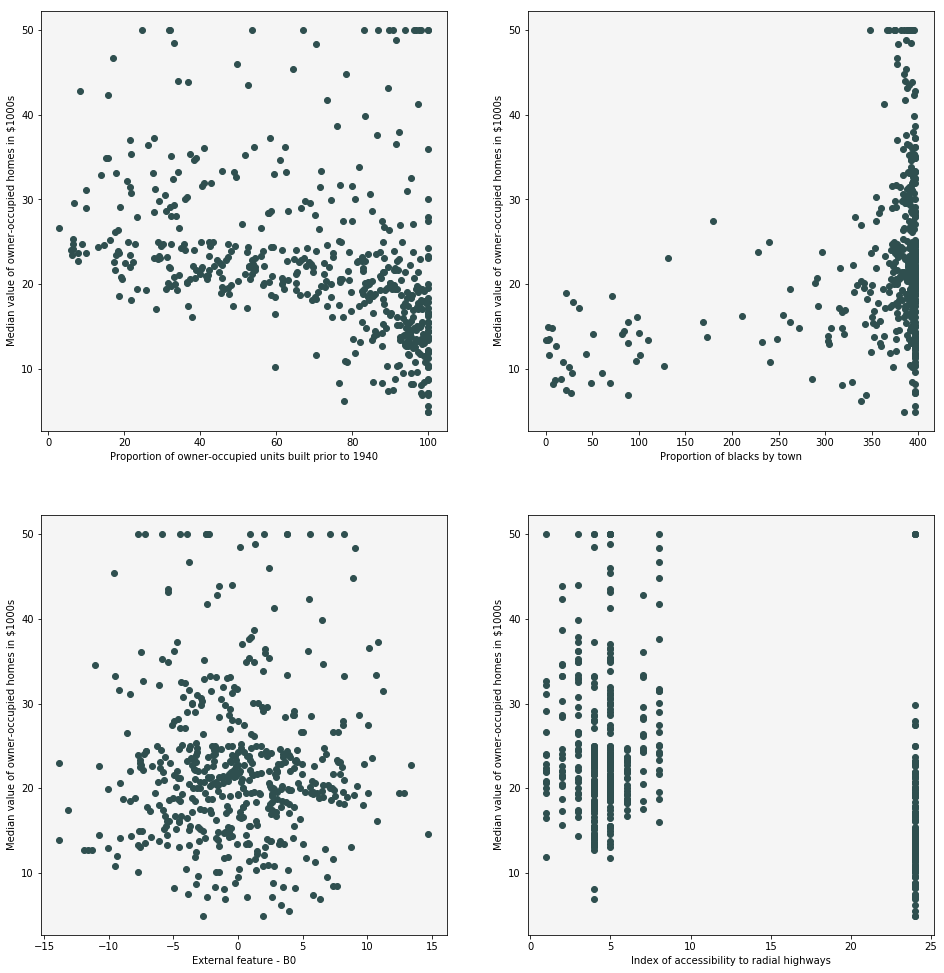

In [34]:
# Irrelevant Features

plt.figure(figsize=(16,17))

# Plot 1 - Age of house by Price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(2,2,1)
plt.scatter(data['AGE'],data['MEDV'],c='darkslategrey')
plt.xlabel('Proportion of owner-occupied units built prior to 1940')
plt.ylabel('Median value of owner-occupied homes in $1000s')


# Plot 2 - Proportion of blacks by Price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(2,2,2)
plt.scatter(data['B'],data['MEDV'],c='darkslategrey')
plt.xlabel('Proportion of blacks by town')
plt.ylabel('Median value of owner-occupied homes in $1000s')

# Plot 3 - External feature by price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(2,2,3)
plt.scatter(data['B0'],data['MEDV'],c='darkslategrey')
plt.xlabel('External feature - B0')
plt.ylabel('Median value of owner-occupied homes in $1000s')

# Plot 4 - Index of accessibility to radial highways by Price
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.subplot(2,2,4)
plt.scatter(data['RAD'],data['MEDV'],c='darkslategrey')
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('Median value of owner-occupied homes in $1000s')


plt.show()



### Loss Function

In [35]:
# Splitting into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [36]:
# Linear Regression

model = LinearRegression()
model = model.fit(X_train, Y_train)
YPred = model.predict(X_test)

In [37]:
def loss_function(model, X_test, Y_test):
    
    """
    Calculates loss function as a measure of cross validation for the passed model.
    Takes three inputs: a) the estimated model 
                        b) the test data X
                        c) and the test labels 
    """
    
    X_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test), axis=1)  # Concatenating a column of 1's for intercept
    coeff = np.concatenate((np.matrix(model.intercept_),(np.matrix(model.coef_).T)),axis=0) # Transposing beta values for legal matrix multiplication
    a = np.matrix(Y_test).T - X_test.dot(coeff) # Error term
    loss = (a.T @ a)/X_test.shape[0] # Loss function
    return loss

In [38]:
loss_function(model,X_test,Y_test)

matrix([[14.35492842]])

In [39]:
# Using sklearn mean squared error just to compare with manual loss function

mean_squared_error(YPred, Y_test)

14.354928421486216

### A few simple regressions

In [40]:
# Running simple regression

# 1st Model with 2 features
X1 = data[['RM','LSTAT']] # Highly correlated

In [41]:
# Kfold with K=10 for Linear Regression

def kfold_mse(df,Y,n_split=10):
    """
    Performs K fold cross validation and calculates the mean squared error
    for the passed dataframe(should not have target class) and the target class.
    """
    mse=[]
    for train,test in KFold(n_splits=n_split).split(df):  # Sklearn Kfold method for KFOLD CV - returns train and tet indices
        
        # Defining train and test data for each fold
        X_train, X_test = df.iloc[train], df.iloc[test]
        y_train, y_test = Y.iloc[train], Y.iloc[test]
       
        # Linear regression
        clf = LinearRegression()
        clf.fit(X_train,y_train)
        
        # Call loss function
        mse.append(loss_function(clf,X_test,y_test))
    
    return np.mean(mse)

In [42]:
kfold_mse(X1,Y)

38.38482773415987

In [32]:
# 2nd model with 10 features

X2 = data[['RM','LSTAT','NOX','TAX','PTRATIO','LSTAT_PTRATIO','AGE','CRIM','B0','B8']]

In [33]:
kfold_mse(X2,Y)

37.55561066886079

In [34]:
# All features - Full Model

X3 = data.drop('MEDV',axis=1)


In [35]:
kfold_mse(X3,Y)

24.865407585554316

The best performance is by the full model as it has the lowest mean squared error.

### Find the best model

We have 34 features so we can build 2**34 models which includes all possible combinations of features.

In [36]:
2**34

17179869184

In [38]:
mse=[]

startTime = datetime.now() # To keep track of time the loop runs.

for i in range(1,21):
    for i in range(1,31):
        features = random.sample(list(X.columns),i) # Selects i features at random from X dataframe.
        Y = data['MEDV']
        mse.append(kfold_mse(data[features],Y,n_split=10)) # Kfold CV Linear Regression
print('Time taken','-',datetime.now() - startTime) # Final time

print('Number of mdoels evauated - ',len(mse)) # Total models evaluated

print('Bytes consumed',sys.getsizeof(mse)) # Memory consumed by the number of models


Time taken - 0:00:17.858261
Number of mdoels evauated -  600
Bytes consumed 5496


In [39]:
((5496*17179869184)/600)

157367601725.44

600 models take ~9 seconds. So approximately, 17179869184 models will take 257698037 seconds or 71582 hours.
600 models take 5496 bytes of memory so 17179869184 will take 157367601725 bytes of memory or ~157 GB of memory. It would not be possible to store all results on our computers memory. 

### Forward Selection

In [40]:
X.shape # Feature Set

(506, 34)

In [43]:
# Evaluating best 1-Feature model

mse={} # Dictionary to hold mse value for each feature model
for i in X.columns:  # One feature at a time
    mse[i]=(kfold_mse(data[[i]],Y,n_split=10))  # performing kfold CV with k=10
print(mse)
min(mse.items(), key=lambda x: x[1]) # Finding the feature with least mse

{'CRIM': 77.68794078129832, 'ZN': 79.34700679551293, 'INDUS': 70.44480413675049, 'CHAS': 90.67640673481797, 'NOX': 74.15075363696404, 'RM': 49.96785597294386, 'AGE': 78.25079719122725, 'DIS': 87.49377626526041, 'RAD': 79.91494202512737, 'TAX': 72.28198981387725, 'PTRATIO': 66.72309452760935, 'B': 81.46082359507983, 'LSTAT': 41.82895807216404, 'CRIM_ZN': 79.92335902694523, 'ZN_INDUS': 84.56761988370607, 'NOX_B': 107.79040647799897, 'LSTAT_PTRATIO': 39.54249624240668, 'CRIM_B': 92.04421510521115, 'LSTAT_RM': 42.97119118212706, 'DIS_RM': 80.43701490528852, 'TAX_log': 71.5342450241462, 'ZN_square': 82.48538572307977, 'RAD_RM': 83.73178677538911, 'B0': 92.4709727141468, 'B1': 92.61462290530451, 'B2': 92.04210744837323, 'B3': 91.906024974948, 'B4': 92.39063621379685, 'B5': 92.1290330560551, 'B6': 92.22687072704232, 'B7': 92.369801908155, 'B8': 92.34663839336092, 'B9': 92.40299489340725, 'B10': 92.1082716575675}


('LSTAT_PTRATIO', 39.54249624240668)

In [42]:

features = ['LSTAT_PTRATIO'] # First feature as evaluated above

cols = list(X.columns.drop('LSTAT_PTRATIO')) # Droping it from iterator

In [43]:
# Repeating untill all features are included
bic=[]
aic=[]
r=[]

while len(features)!=34:  # Run untill all features are added
    print(features) # Prints selected models at each iteration
    mse={}
    for i in cols:
        mse[i]=(kfold_mse(data[[*features,i]],Y,n_split=10))
    #print(mse,'\n')
    result = min(mse.items(), key=lambda x: x[1])[0]
    features.append(result) # Append to the list
    model = sm.ols(formula='MEDV ~ '+' + '.join(features), data=data).fit() # OLS with selected features
    bic.append(model.bic) # Calculate BIC
    aic.append(model.aic) # Calculate AIC
    r.append(model.rsquared_adj) # Calculate Adjusted R squared
    cols.remove(result) # Remove the selected feature from iterator


['LSTAT_PTRATIO']
['LSTAT_PTRATIO', 'RM']
['LSTAT_PTRATIO', 'RM', 'PTRATIO']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM', 'CHAS']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM', 'CHAS', 'CRIM_ZN']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM', 'CHAS', 'CRIM_ZN', 'B9']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM', 'CHAS', 'CRIM_ZN', 'B9', 'B8']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM', 'CHAS', 'CRIM_ZN', 'B9', 'B8', 'B7']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM', 'CHAS', 'CRIM_ZN', 'B9', 'B8', 'B7', 'B6']
['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM', '

In [44]:
np.argmin(bic) # Finding the index at which bic was minimum

16

In [45]:
best_model = features[:(np.argmin(bic) + 1)] # Finding best model based on BIC
print(best_model)

['LSTAT_PTRATIO', 'RM', 'PTRATIO', 'LSTAT_RM', 'LSTAT', 'CRIM', 'DIS_RM', 'CHAS', 'CRIM_ZN', 'B9', 'B8', 'B7', 'B6', 'ZN_square', 'ZN_INDUS', 'NOX', 'RAD']


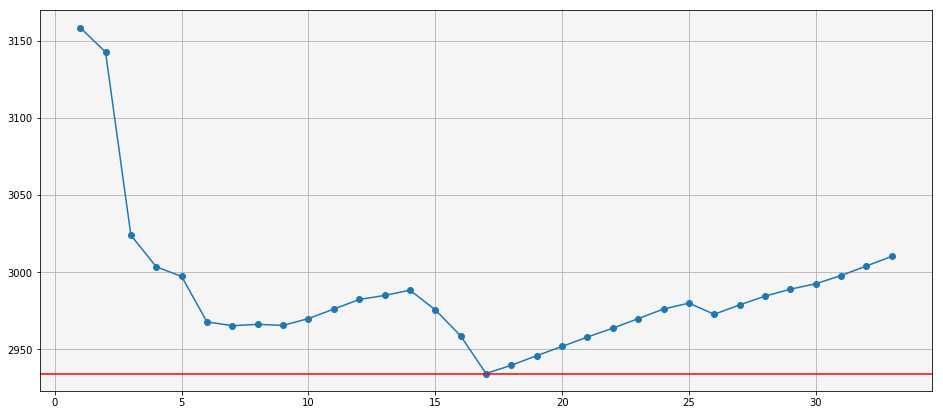

In [128]:
# Plotting BIC vs Number of features

plt.figure(figsize=(16,7))
plt.plot(range(1,34),bic,marker='o')
plt.grid(b=True)
plt.axhline(min(bic),color='r')
plt.show()

In [48]:
# Finding the index at which AIC was minimum
np.argmin(aic)

16

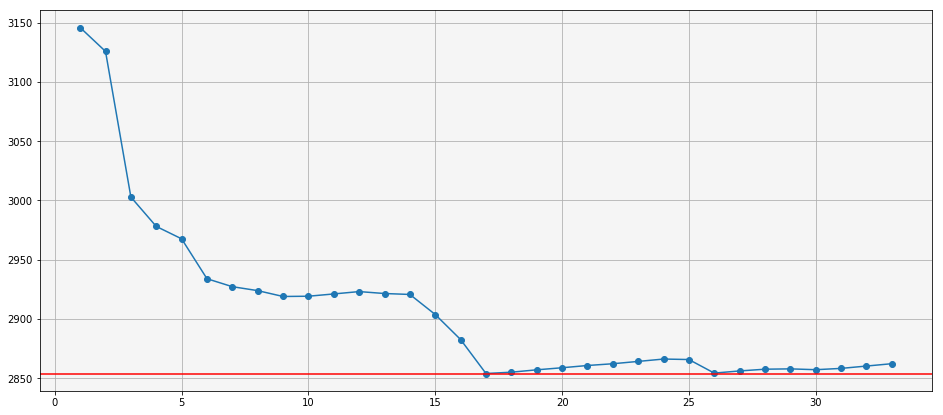

In [127]:
# PLotting AIC vs No of features
plt.figure(figsize=(16,7))
plt.plot(range(1,34),aic,marker='o')
plt.grid(b=True)
plt.axhline(min(aic),color='r')
plt.show()

In [51]:
# Finding the index with maximum value of Adjusted rsquare
np.argmax(r)

29

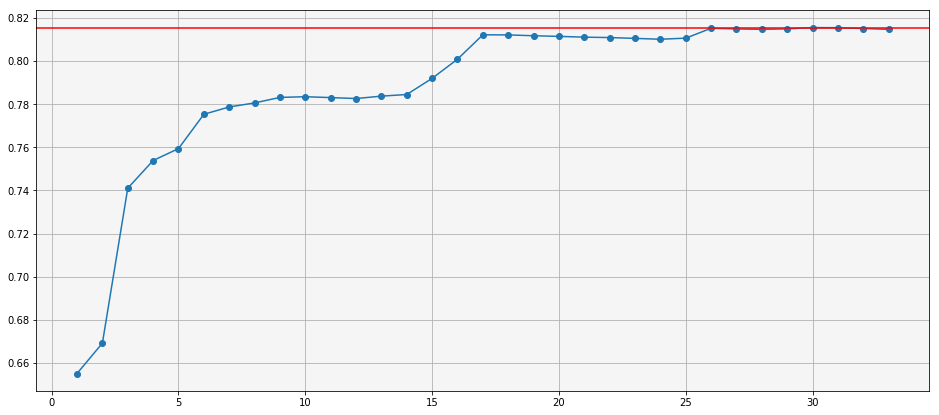

In [131]:
# Plotting adjusted rsquare vs No of features
plt.figure(figsize=(16,7))
plt.plot(range(1,34),r,marker='o')
plt.grid(b=True)
plt.axhline(max(r),color='r')
plt.show()

### Principle Components

In [56]:
# PCA on raw features

X = data.drop('MEDV',axis=1)
pca = PCA(n_components=34)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=34, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [80]:
# Explained variance by each component

explained_variance = list(pca.explained_variance_)

In [82]:
var = pd.DataFrame()
var['Components'] = range(1,35)
var['explained_variance'] = explained_variance


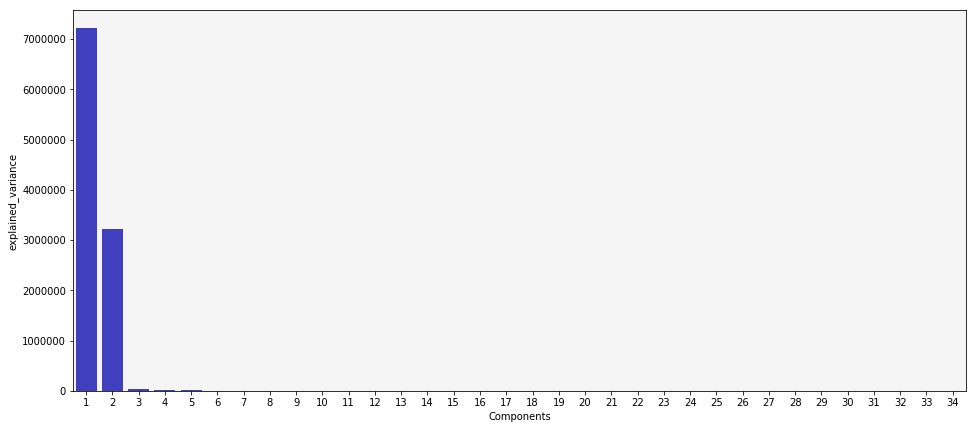

In [92]:
plt.figure(figsize=(16,7))
sns.barplot(x="Components", y="explained_variance", data=var, color="salmon", saturation=.5)

In [83]:
# Proportion of variance explained by each principle component

proportion_explained_variance = list(pca.explained_variance_ratio_)
var['proportion_explained_variance'] = proportion_explained_variance

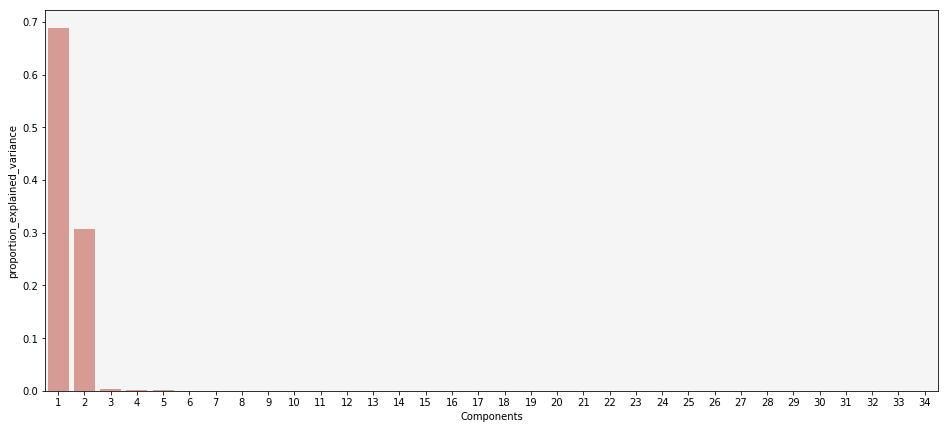

In [84]:
plt.figure(figsize=(16,7))
sns.barplot(x="Components", y="proportion_explained_variance", data=var, color="salmon", saturation=.5)

In [89]:
cumulative_explained_variance = list(pca.explained_variance_ratio_.cumsum())
var['cumulative_explained_variance'] = cumulative_explained_variance
var

,Components,explained_variance,proportion_explained_variance,cumulative_explained_variance
0,1,7.212079e+06,6.876003e-01,0.687600
1,2,3.221240e+06,3.071134e-01,0.994714
2,3,3.225729e+04,3.075413e-03,0.997789
3,4,1.032598e+04,9.844795e-04,0.998774
4,5,7.583507e+03,7.230123e-04,0.999497
5,6,3.352075e+03,3.195872e-04,0.999816
6,7,7.185430e+02,6.850596e-05,0.999885
7,8,4.979970e+02,4.747908e-05,0.999932
8,9,2.178648e+02,2.077125e-05,0.999953
9,10,8.764475e+01,8.356059e-06,0.999961


We can see that majority of the variance is explained by the first two principle components 

In [93]:
# Rotating the data to be parallel to x axis

In [94]:
cols = []
for i in range(1,35):
    cols.append('pc'+str(i)) 

In [95]:
X.shape

(506, 34)

In [98]:
rotated = pd.DataFrame(pca.fit_transform(X),columns=cols) # Dataframe with principle components

In [99]:
rotated.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34
0,-919.399216,-502.409077,177.358115,-67.845224,4.354305,-11.701014,14.438120,24.734515,-1.257893,-0.551158,...,-1.677901,-2.635694,-2.547765,-0.940513,-0.444606,-0.525117,-0.170481,-0.011502,0.044865,0.001857
1,-856.470276,-822.908760,168.186072,30.716257,23.569786,-40.844903,-2.535021,-0.150984,-21.345758,0.654626,...,1.781684,0.812423,-0.648740,0.112553,-0.321348,-0.099344,-0.083096,0.022419,0.043320,0.008788
2,-859.038998,-820.787913,220.209856,-48.291455,41.186333,-48.319083,-6.174479,3.326857,-8.713265,1.446202,...,-1.033922,0.739053,0.043635,-0.336530,-0.534526,0.399069,-0.029899,0.031235,0.050952,0.001940
3,-858.153005,-819.701084,244.936451,-54.259630,51.342853,-49.577960,-16.748225,-7.609203,0.730844,5.931809,...,-3.642509,0.758312,0.497633,-0.359190,-0.397195,0.435186,-0.129248,0.075385,0.083083,0.006846
4,-842.512015,-818.302759,219.463243,-15.108138,42.601121,-45.843056,-15.021144,-11.137645,-4.385346,-2.110974,...,-3.944221,0.246976,0.758701,-0.212247,-0.525453,0.582926,-0.005920,0.108809,0.076223,0.003277


In [100]:
# Starting with the first, added pca's one by one.

features = list(rotated.columns)
mse_list=[]
for i in range(1,35):
    mse=(kfold_mse(rotated[features[:i]],Y,n_split=10))
    mse_list.append(mse)

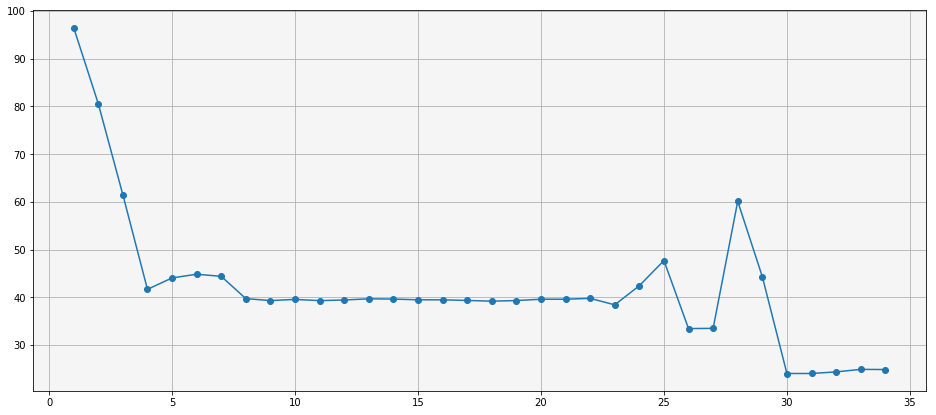

In [106]:
# Plotting MSE vs PCAs
plt.figure(figsize=(16,7))
plt.plot(range(1,35),mse_list,marker='o')
plt.grid(b=True)
plt.show()

In [107]:
# Finding minimum mse
np.argmin(mse_list)

29

30 components give the least cross validated MSE

In [108]:
def normalize_feature(array):
    """
    Normalizes a passed feature based on xn = x − xbar / sdx
    """
    mean = array.mean() #mean
    std = array.std() # standard deviation
    
    norm_feature = (array - mean )/std
    
    return norm_feature

In [109]:
# A dataframe with normalized features - Does not include target class
normalized_df = pd.DataFrame()
for i in X.columns:
    normalized_feature = normalize_feature(X[i])
    normalized_df[i]=normalized_feature

In [110]:
cols = []
for i in range(1,35):
    cols.append('pc_normalized'+str(i)) 

In [111]:
# Rotating the data

rotated_normalized = pd.DataFrame(pca.fit_transform(normalized_df),columns=cols)

In [112]:
features = list(rotated_normalized.columns)
mse_list=[]
for i in range(1,35):
    mse=(kfold_mse(rotated_normalized[features[:i]],Y,n_split=10))
    mse_list.append(mse)

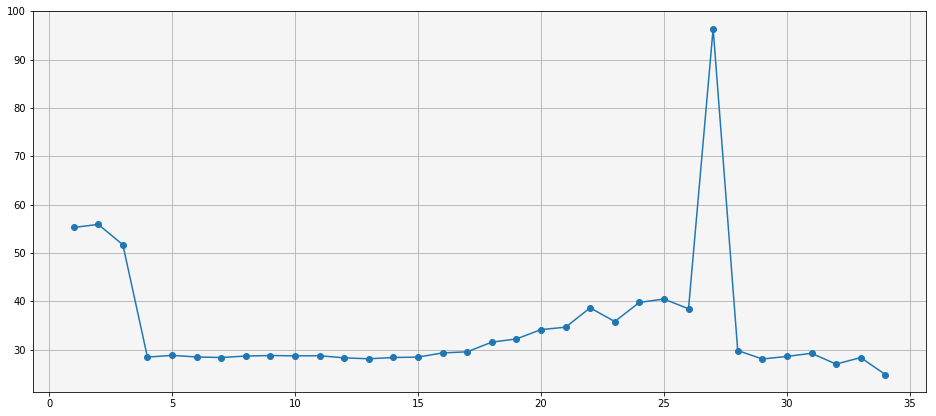

In [114]:
plt.figure(figsize=(16,7))
plt.plot(range(1,35),mse_list,marker='o')
plt.grid(b=True)
plt.show()

In [115]:
np.argmin(mse_list)

33